In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Georgia

In [2]:
# Step 0: Load the data
df_excel = pd.read_excel('Results/Georgia_15_con_01_MAE_states.xlsx', header=[0, 1], index_col=0)

# Step 1: Convert to long format
df_long = df_excel.stack([0,1]).reset_index()
df_long.columns = ['Index', 'Métrica', 'Modelo', 'Valor']

MAEs_georgia = df_long.loc[df_long['Métrica'] == 'MAE',['Index','Modelo','Valor']]

# Transform MAPE_sintetico to a table with rows by index and columns by model
MAEs_georgia_pivot = MAEs_georgia.pivot(index='Index', columns='Modelo', values='Valor') 

# Step 2: Group and calculate statistics
stats = df_long.groupby(['Modelo', 'Métrica'])['Valor'].agg(['mean', 'std'])

# Step 3: Reshape so that metrics are columns and each has subcolumns with mean, std, min, max
stats_wide = stats.unstack(level=1)

# Step 4: Optional: order columns to ensure desired format
# This puts ['mean', 'std', 'min', 'max'] in order for each metric
estadisticas_por_modelo_escalada_01 = stats_wide.swaplevel(axis=1).sort_index(axis=1, level=0)

# Result: index by model, columns with MultiIndex (metric, statistic)
display(estadisticas_por_modelo_escalada_01)

# Select all metrics for the model with the best MAPE
mejor_mape_georgia = estadisticas_por_modelo_escalada_01['MAPE']['mean'].idxmin()
mejor_modelo_georgia = estadisticas_por_modelo_escalada_01.loc[mejor_mape_georgia, :]
print(f"The model with the best MAPE is: {mejor_mape_georgia}")


C:\Users\ammun\AppData\Local\Temp\ipykernel_16108\167649908.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_excel.stack([0,1]).reset_index()


Métrica       MAE                MAPE                NMSE                 REP  \
             mean       std      mean       std      mean       std      mean   
Modelo                                                                          
GW-SVR   2.662565  0.691695  0.237282  0.046669  0.649419  0.283528  0.240004   
GWR      2.631888  0.540605  0.248016  0.052551  0.648653  0.467880  0.239778   
LR       2.880610  0.657358  0.274647  0.066196  0.714211  0.481517  0.261729   
SVR      2.761984  0.692710  0.248473  0.049066  0.714398  0.402862  0.249294   

Métrica            
              std  
Modelo             
GW-SVR   0.046322  
GWR      0.046047  
LR       0.053040  
SVR      0.049167

The model with the best MAPE is: GW-SVR


In [3]:
MAE_georgia = estadisticas_por_modelo_escalada_01[('MAE', 'mean')]

# Create summary statistics table for each model (mean±std)
summary = estadisticas_por_modelo_escalada_01.copy()
# Format each metric as "mean±std"
for metric in ['MAE', 'MAPE', 'NMSE', 'REP']:
    summary[(metric, 'mean±std')] = summary[(metric, 'mean')].round(2).astype(str) + '±' + summary[(metric, 'std')].round(2).astype(str)

# Select only the formatted columns
summary_formatted = summary.loc[:, [(m, 'mean±std') for m in ['MAE', 'MAPE', 'NMSE', 'REP']]]
summary_formatted.columns = ['MAE', 'MAPE', 'NMSE', 'REP']

# Show the table
display(summary_formatted)

# Copy to clipboard
summary_formatted.to_clipboard(index=True)


,MAE,MAPE,NMSE,REP
Modelo,,,,
GW-SVR,2.66±0.69,0.24±0.05,0.65±0.28,0.24±0.05
GWR,2.63±0.54,0.25±0.05,0.65±0.47,0.24±0.05
LR,2.88±0.66,0.27±0.07,0.71±0.48,0.26±0.05
SVR,2.76±0.69,0.25±0.05,0.71±0.4,0.25±0.05


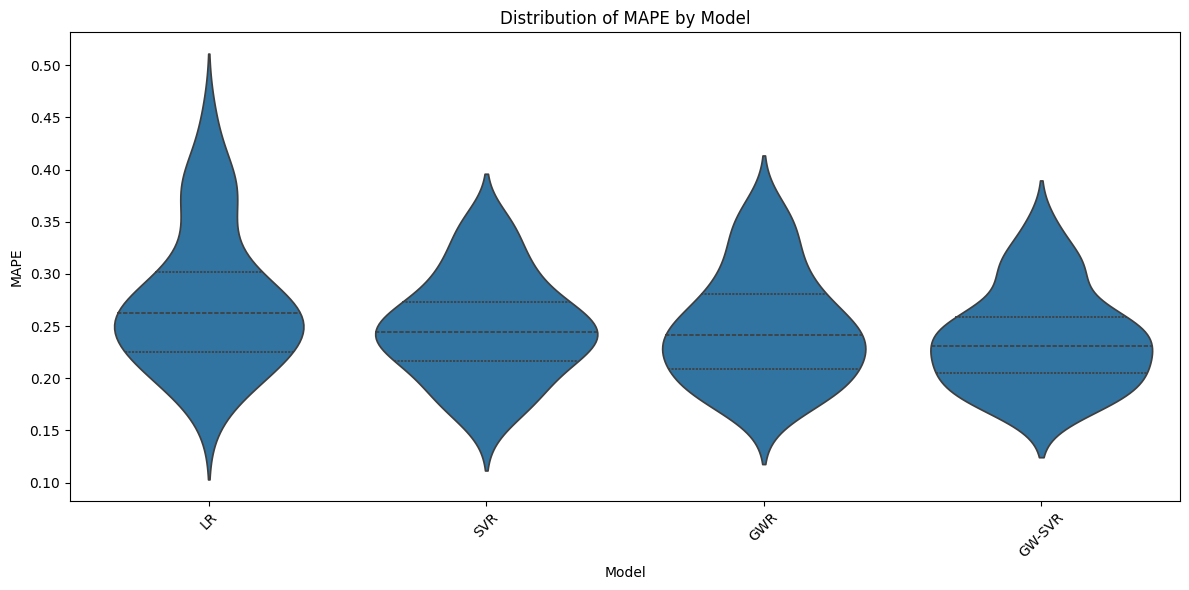

In [4]:
# Violin plot for MAPE and model
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long[df_long['Métrica'] == 'MAPE'], x='Modelo', y='Valor', inner='quartile')
plt.title('Distribution of MAPE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.tight_layout()


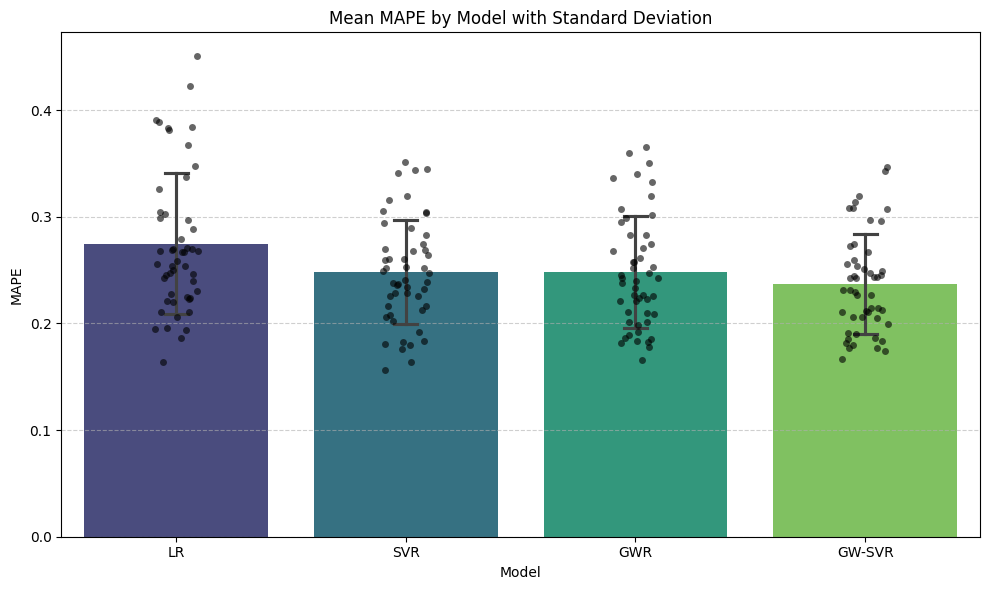

In [5]:
# Barplot + stripplot for MAPE and modelo
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
	hue='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	errorbar='sd',
	legend=False,
    palette='viridis',
    capsize=0.1
)
sns.stripplot(
	x='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	color='black',
	alpha=0.6,
	jitter=True
)
plt.title('Mean MAPE by Model with Standard Deviation')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


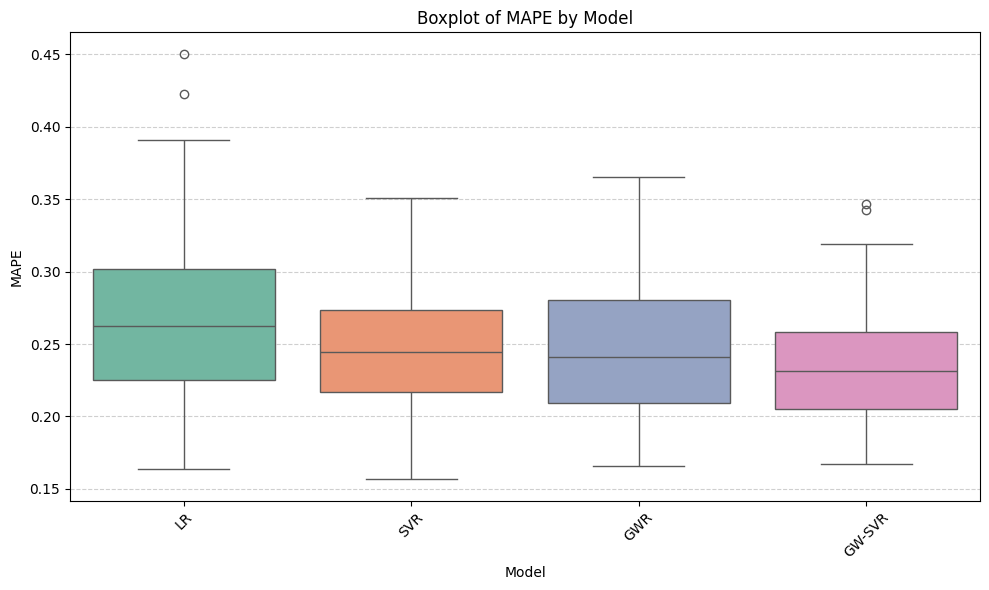

In [6]:
# Boxplot for MAPE and modelo
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo',
    hue='Modelo',
    y='Valor',
    data=df_long[df_long['Métrica'] == 'MAPE'],
    palette='Set2',
    legend=False
)
plt.title('Boxplot of MAPE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# PM25

In [7]:
# Step 0: Load the data for PM2.5
df_excel = pd.read_excel('Results/PM25_15_con_005_MAE_states.xlsx', header=[0, 1], index_col=0)

# Step 1: Convert to long format
df_long = df_excel.stack([0,1]).reset_index()
df_long.columns = ['Index', 'Métrica', 'Modelo', 'Valor']

MAEs_pm25 = df_long.loc[df_long['Métrica'] == 'MAE',['Index','Modelo','Valor']]

# Transform MAPE_sintetico to a table with rows by index and columns by model
MAEs_pm25_pivot = MAEs_pm25.pivot(index='Index', columns='Modelo', values='Valor') 

# Step 2: Group and calculate statistics
stats = df_long.groupby(['Modelo', 'Métrica'])['Valor'].agg(['mean', 'std'])

# Step 3: Reshape so that metrics are columns and each has subcolumns with mean, std, min, max
stats_wide = stats.unstack(level=1)

# Step 4: Optional: order columns to ensure desired format
# This puts ['mean', 'std', 'min', 'max'] in order for each metric
estadisticas_por_modelo_escalada_005 = stats_wide.swaplevel(axis=1).sort_index(axis=1, level=0)

# Result: index by model, columns with MultiIndex (metric, statistic)
display(estadisticas_por_modelo_escalada_005)

# Select all metrics for the model with the best MAPE
mejor_mape_pm25 = estadisticas_por_modelo_escalada_005['MAPE']['mean'].idxmin()
mejor_modelo_pm25 = estadisticas_por_modelo_escalada_005.loc[mejor_mape_pm25, :]
print(f"The model with the best MAPE is: {mejor_mape_pm25}")


C:\Users\ammun\AppData\Local\Temp\ipykernel_16108\1131557040.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_excel.stack([0,1]).reset_index()


Métrica        MAE                MAPE                NMSE            \
              mean       std      mean       std      mean       std   
Modelo                                                                 
GW-SVR   18.247600  3.091565  0.481746  0.158610  0.695650  0.190219   
GWR      19.464300  2.973913  0.524727  0.180119  0.828763  0.310312   
LR       21.479554  2.912302  0.591973  0.164259  0.887135  0.214872   
SVR      19.526772  3.135520  0.505394  0.153116  0.778935  0.223973   

Métrica       REP            
             mean       std  
Modelo                       
GW-SVR   0.311308  0.049901  
GWR      0.332874  0.054223  
LR       0.367081  0.049311  
SVR      0.333059  0.050392

The model with the best MAPE is: GW-SVR


In [8]:
MAE_pm25 = estadisticas_por_modelo_escalada_005[('MAE', 'mean')]

# Create summary statistics table for each model (mean±std)
summary = estadisticas_por_modelo_escalada_005.copy()
# Format each metric as "mean±std"
for metric in ['MAE', 'MAPE', 'NMSE', 'REP']:
    summary[(metric, 'mean±std')] = summary[(metric, 'mean')].round(2).astype(str) + '±' + summary[(metric, 'std')].round(2).astype(str)

# Select only the formatted columns
summary_formatted = summary.loc[:, [(m, 'mean±std') for m in ['MAE', 'MAPE', 'NMSE', 'REP']]]
summary_formatted.columns = ['MAE', 'MAPE', 'NMSE', 'REP']

# Show the table
display(summary_formatted)

# Copy to clipboard
summary_formatted.to_clipboard(index=True)


,MAE,MAPE,NMSE,REP
Modelo,,,,
GW-SVR,18.25±3.09,0.48±0.16,0.7±0.19,0.31±0.05
GWR,19.46±2.97,0.52±0.18,0.83±0.31,0.33±0.05
LR,21.48±2.91,0.59±0.16,0.89±0.21,0.37±0.05
SVR,19.53±3.14,0.51±0.15,0.78±0.22,0.33±0.05


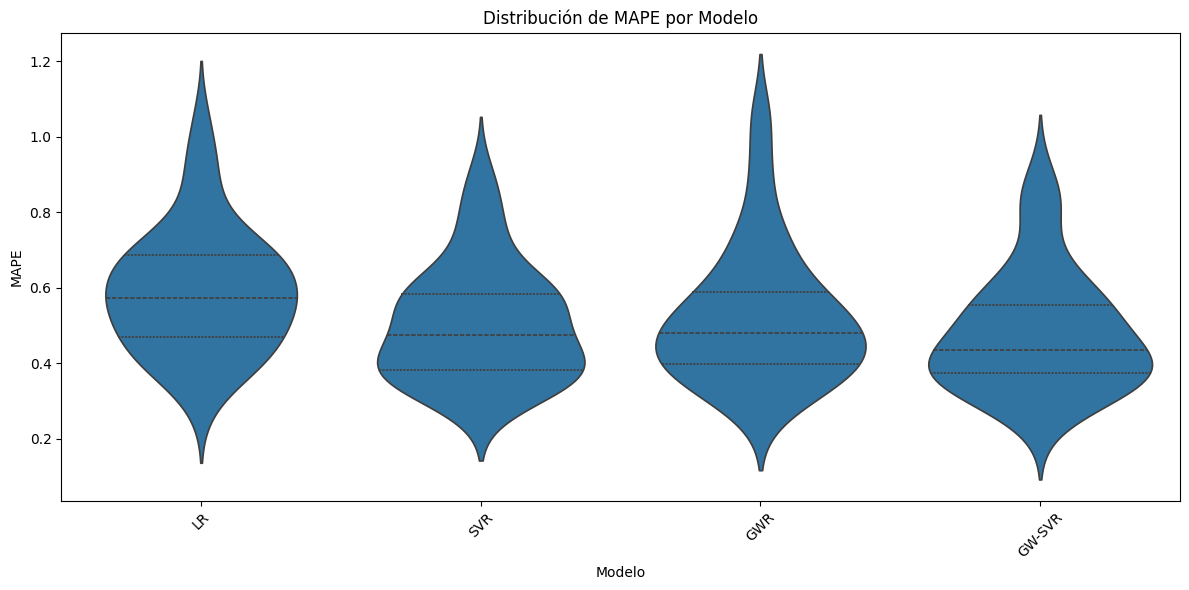

In [9]:
# Violin plot for MAPE and model
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long[df_long['Métrica'] == 'MAPE'], x='Modelo', y='Valor', inner='quartile')
plt.title('Distribución de MAPE por Modelo')
plt.xticks(rotation=45)
plt.xlabel('Modelo')
plt.ylabel('MAPE')
plt.tight_layout()


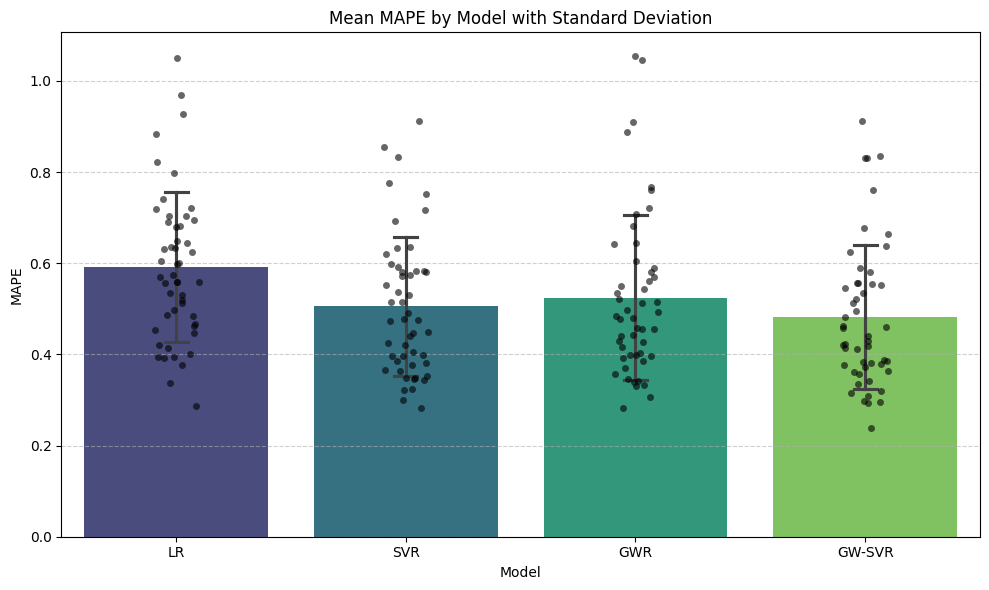

In [10]:
# Barplot + stripplot for MAPE and model
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
	hue='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	errorbar='sd',
	legend=False,
    palette='viridis',
    capsize=0.1
)
sns.stripplot(
	x='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	color='black',
	alpha=0.6,
	jitter=True
)
plt.title('Mean MAPE by Model with Standard Deviation')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


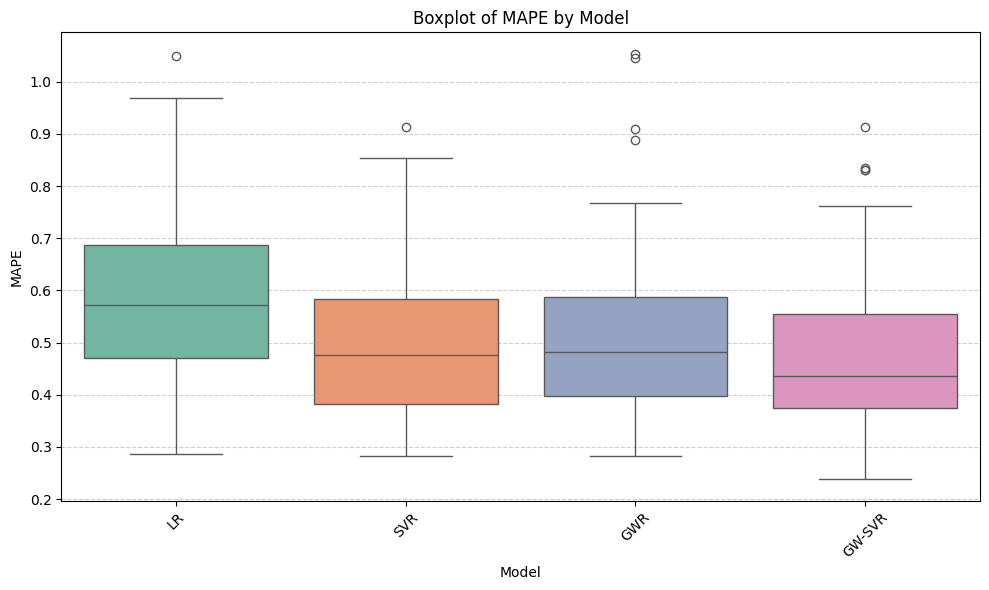

In [11]:
# Boxplot for MAPE and model
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo',
    hue='Modelo',
    y='Valor',
    data=df_long[df_long['Métrica'] == 'MAPE'],
    palette='Set2',
    legend=False
)
plt.title('Boxplot of MAPE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Baltimore

In [12]:
# Step 0: Load the data for Baltimore
df_excel = pd.read_excel('Results/Baltimore_15_con_0075_MAE_states.xlsx', header=[0, 1], index_col=0)

# Step 1: Convert to long format
df_long = df_excel.stack([0,1]).reset_index()
df_long.columns = ['Index', 'Métrica', 'Modelo', 'Valor']

MAEs_baltimore = df_long.loc[df_long['Métrica'] == 'MAE',['Index','Modelo','Valor']]

# Transform MAPE_sintetico to a table with rows by index and columns by model
MAEs_baltimore_pivot = MAEs_baltimore.pivot(index='Index', columns='Modelo', values='Valor') 

# Step 2: Group and calculate statistics
stats = df_long.groupby(['Modelo', 'Métrica'])['Valor'].agg(['mean', 'std'])

# Step 3: Reshape so that metrics are columns and each has subcolumns with mean, std, min, max
stats_wide = stats.unstack(level=1)

# Step 4: Optional: order columns to ensure desired format
# This puts ['mean', 'std', 'min', 'max'] in order for each metric
estadisticas_por_modelo_escalada_0075 = stats_wide.swaplevel(axis=1).sort_index(axis=1, level=0)

# Result: index by model, columns with MultiIndex (metric, statistic)
display(estadisticas_por_modelo_escalada_0075)

# Select all metrics for the model with the best MAPE
mejor_mape_baltimore = estadisticas_por_modelo_escalada_0075['MAPE']['mean'].idxmin()
mejor_modelo_baltimore = estadisticas_por_modelo_escalada_0075.loc[mejor_mape_baltimore, :]
print(f"The model with the best MAPE is: {mejor_mape_baltimore}")


C:\Users\ammun\AppData\Local\Temp\ipykernel_16108\931510861.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_excel.stack([0,1]).reset_index()


Métrica       MAE                MAPE                NMSE                 REP  \
             mean       std      mean       std      mean       std      mean   
Modelo                                                                          
GW-SVR   9.648960  2.266401  0.335249  0.154847  0.488623  0.094618  0.218688   
GWR      9.252708  1.408097  0.318166  0.141810  0.366331  0.134132  0.211382   
LR       9.375364  1.659793  0.306447  0.139276  0.365296  0.116553  0.213559   
SVR      9.053947  1.685102  0.304431  0.122878  0.361963  0.103769  0.205988   

Métrica            
              std  
Modelo             
GW-SVR   0.041508  
GWR      0.029977  
LR       0.031844  
SVR      0.030626

The model with the best MAPE is: SVR


In [13]:
MAE_baltimore = estadisticas_por_modelo_escalada_0075[('MAE', 'mean')]
# Create summary statistics table for each model (mean±std)
summary = estadisticas_por_modelo_escalada_0075.copy()
# Format each metric as "mean±std"
for metric in ['MAE', 'MAPE', 'NMSE', 'REP']:
    summary[(metric, 'mean±std')] = summary[(metric, 'mean')].round(2).astype(str) + '±' + summary[(metric, 'std')].round(2).astype(str)

# Select only the formatted columns
summary_formatted = summary.loc[:, [(m, 'mean±std') for m in ['MAE', 'MAPE', 'NMSE', 'REP']]]
summary_formatted.columns = ['MAE', 'MAPE', 'NMSE', 'REP']

# Show the table
display(summary_formatted)

# Copy to clipboard
summary_formatted.to_clipboard(index=True)


,MAE,MAPE,NMSE,REP
Modelo,,,,
GW-SVR,9.65±2.27,0.34±0.15,0.49±0.09,0.22±0.04
GWR,9.25±1.41,0.32±0.14,0.37±0.13,0.21±0.03
LR,9.38±1.66,0.31±0.14,0.37±0.12,0.21±0.03
SVR,9.05±1.69,0.3±0.12,0.36±0.1,0.21±0.03


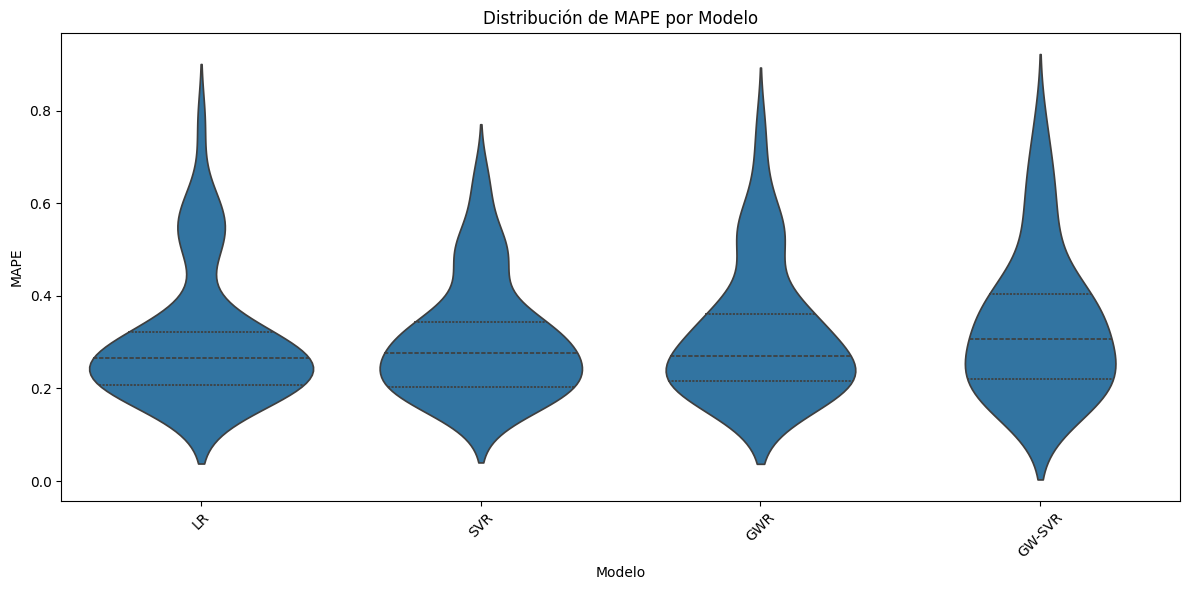

In [14]:
# Violin plot for MAPE and model
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long[df_long['Métrica'] == 'MAPE'], x='Modelo', y='Valor', inner='quartile')
plt.title('Distribución de MAPE por Modelo')
plt.xticks(rotation=45)
plt.xlabel('Modelo')
plt.ylabel('MAPE')
plt.tight_layout()


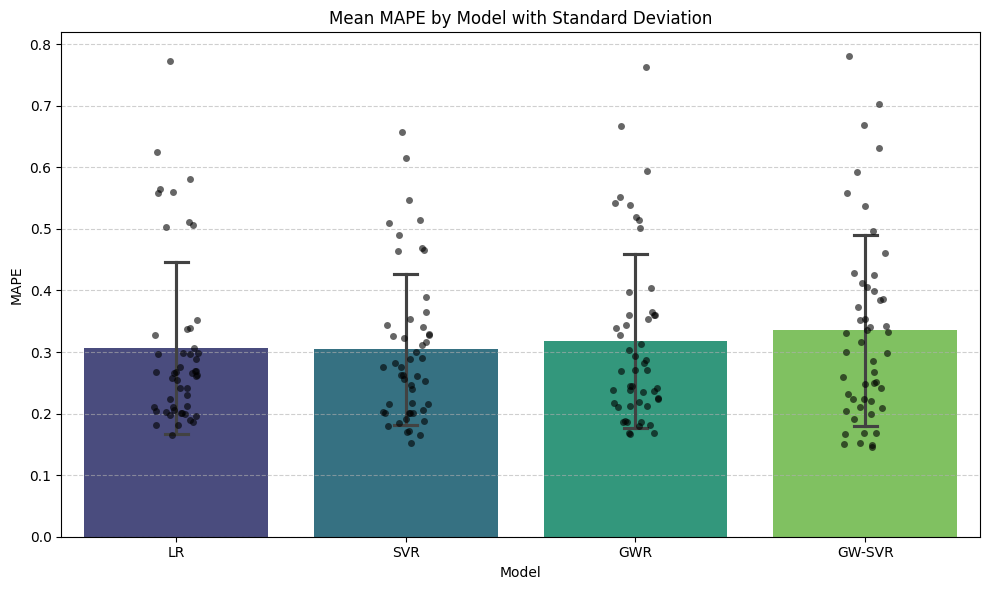

In [15]:
# Barplot + stripplot for MAPE and model
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
	hue='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	errorbar='sd',
	legend=False,
    palette='viridis',
    capsize=0.1
)
sns.stripplot(
	x='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	color='black',
	alpha=0.6,
	jitter=True
)
plt.title('Mean MAPE by Model with Standard Deviation')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


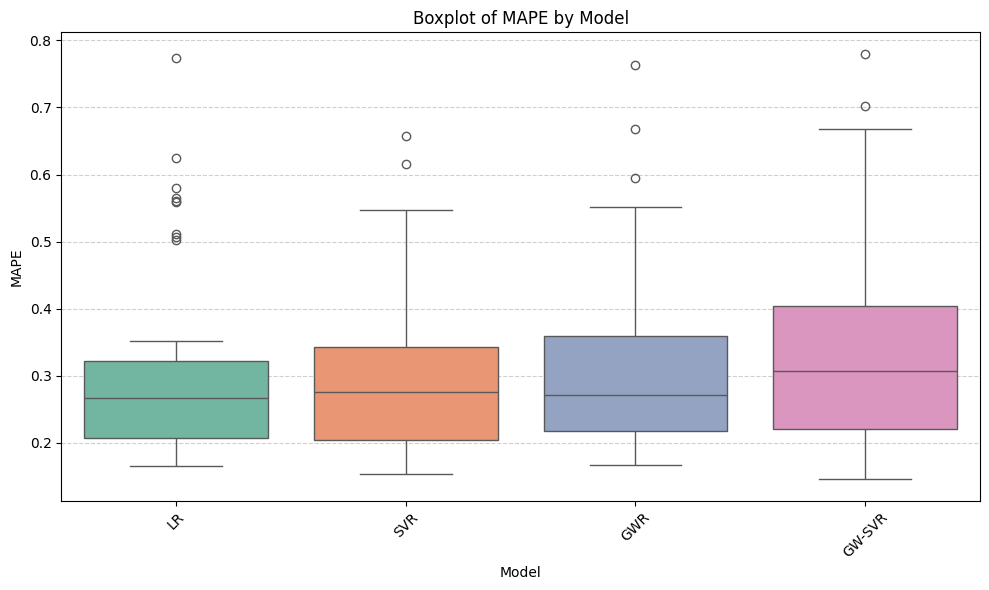

In [16]:
# Boxplot for MAPE and model
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo',
    hue='Modelo',
    y='Valor',
    data=df_long[df_long['Métrica'] == 'MAPE'],
    palette='Set2',
    legend=False
)
plt.title('Boxplot of MAPE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Columbus

In [17]:
# Step 0: Load the data for Columbus
df_excel = pd.read_excel('Results/Columbus_15_con_01_MAE_states.xlsx', header=[0, 1], index_col=0)

# Step 1: Convert to long format
df_long = df_excel.stack([0,1]).reset_index()
df_long.columns = ['Index', 'Métrica', 'Modelo', 'Valor']

MAEs_columbus = df_long.loc[df_long['Métrica'] == 'MAE',['Index','Modelo','Valor']]

# Transform MAPE_sintetico to a table with rows by index and columns by model
MAEs_columbus_pivot = MAEs_columbus.pivot(index='Index', columns='Modelo', values='Valor') 

# Step 2: Group and calculate statistics
stats = df_long.groupby(['Modelo', 'Métrica'])['Valor'].agg(['mean', 'std'])

# Step 3: Reshape so that metrics are columns and each has subcolumns with mean, std, min, max
stats_wide = stats.unstack(level=1)

# Step 4: Optional: order columns to ensure desired format
# This puts ['mean', 'std', 'min', 'max'] in order for each metric
estadisticas_por_modelo_escalada_01 = stats_wide.swaplevel(axis=1).sort_index(axis=1, level=0)

# Result: index by model, columns with MultiIndex (metric, statistic)
display(estadisticas_por_modelo_escalada_01)

mejor_mae_columbus = estadisticas_por_modelo_escalada_01['MAE']['mean'].idxmin()
mejor_modelo_columbus = estadisticas_por_modelo_escalada_01.loc[mejor_mae_columbus, :]
print(f"The model with the best MAE is: {mejor_mae_columbus}")


C:\Users\ammun\AppData\Local\Temp\ipykernel_16108\1751289333.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_excel.stack([0,1]).reset_index()


Métrica       MAE                MAPE                 NMSE            \
             mean       std      mean        std      mean       std   
Modelo                                                                 
GW-SVR   7.704723  2.477779  6.788341  11.303567  0.447388  0.207488   
GWR      9.180826  2.378548  5.134132  10.517291  0.683935  0.540540   
LR       8.294611  2.555129  4.338325  10.119532  0.590302  0.420043   
SVR      8.298353  2.861325  4.977482  10.427868  0.558568  0.434215   

Métrica       REP            
             mean       std  
Modelo                       
GW-SVR   0.223939  0.087739  
GWR      0.266001  0.088754  
LR       0.239044  0.083402  
SVR      0.238034  0.090176

The model with the best MAE is: GW-SVR


In [18]:
MAE_columbus = estadisticas_por_modelo_escalada_01[('MAE', 'mean')]

# Crear tabla resumen de estadísticos para cada modelo (mean±std)
summary = estadisticas_por_modelo_escalada_01.copy()
# Formatear cada métrica como "mean±std"
for metric in ['MAE', 'MAPE', 'NMSE', 'REP']:
    summary[(metric, 'mean±std')] = summary[(metric, 'mean')].round(2).astype(str) + '±' + summary[(metric, 'std')].round(2).astype(str)

# Seleccionar solo las columnas formateadas
summary_formatted = summary.loc[:, [(m, 'mean±std') for m in ['MAE', 'MAPE', 'NMSE', 'REP']]]
summary_formatted.columns = ['MAE', 'MAPE', 'NMSE', 'REP']

# Mostrar la tabla
display(summary_formatted)

# Copiar al portapapeles
summary_formatted.to_clipboard(index=True)


,MAE,MAPE,NMSE,REP
Modelo,,,,
GW-SVR,7.7±2.48,6.79±11.3,0.45±0.21,0.22±0.09
GWR,9.18±2.38,5.13±10.52,0.68±0.54,0.27±0.09
LR,8.29±2.56,4.34±10.12,0.59±0.42,0.24±0.08
SVR,8.3±2.86,4.98±10.43,0.56±0.43,0.24±0.09


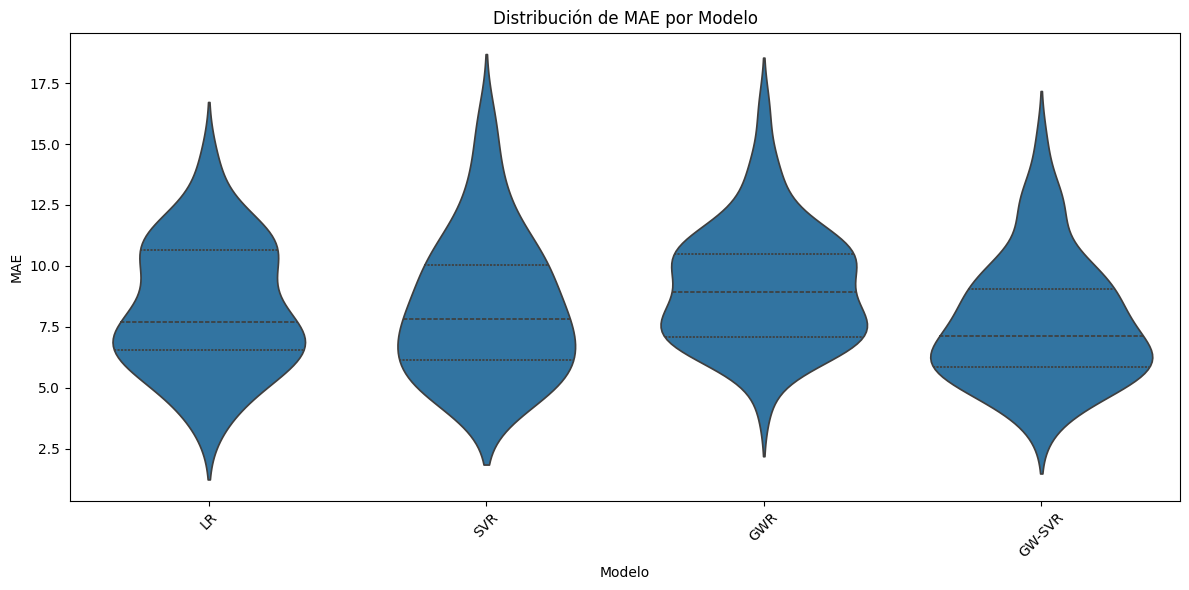

In [19]:
# Violin plot for MAE and model
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long[df_long['Métrica'] == 'MAE'], x='Modelo', y='Valor', inner='quartile')
plt.title('Distribución de MAE por Modelo')
plt.xticks(rotation=45)
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.tight_layout()


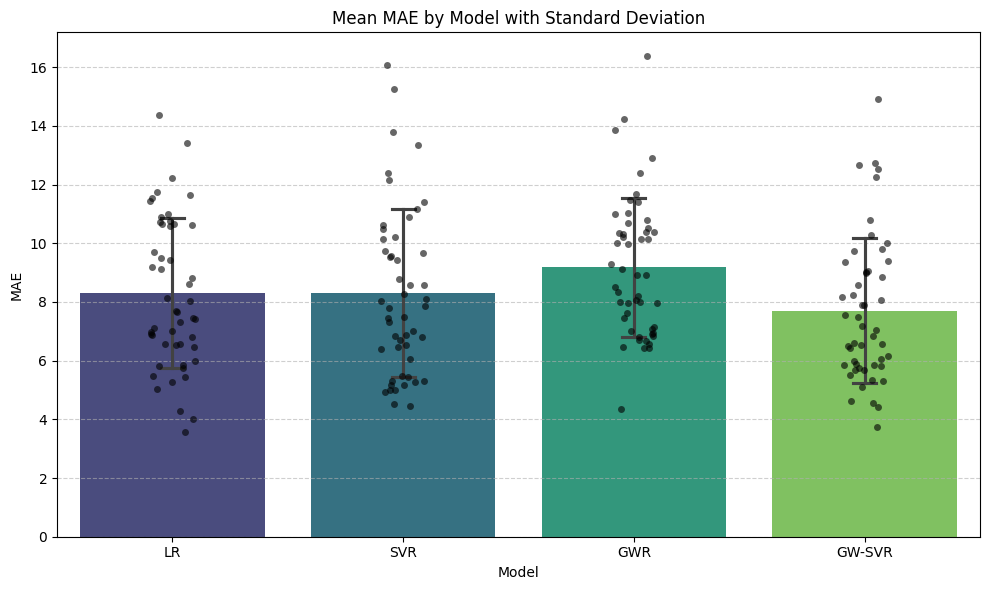

In [20]:
# Barplot + stripplot for MAE and model
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
	hue='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAE'],
	errorbar='sd',
	legend=False,
    palette='viridis',
    capsize=0.1
)
sns.stripplot(
	x='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAE'],
	color='black',
	alpha=0.6,
	jitter=True
)
plt.title('Mean MAE by Model with Standard Deviation')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


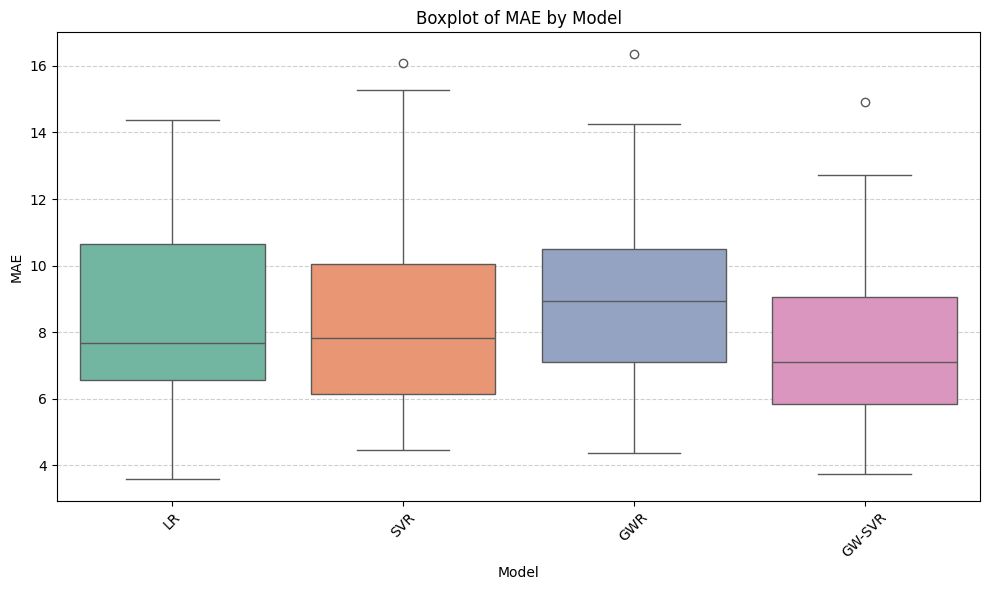

In [21]:
# Boxplot for MAE and model
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo',
    hue='Modelo',
    y='Valor',
    data=df_long[df_long['Métrica'] == 'MAE'],
    palette='Set2',
    legend=False
)
plt.title('Boxplot of MAE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Synthetic

In [22]:
# Step 0: Load the data for Sintetico MAE
df_excel = pd.read_excel('Results/Sintetico_15_con_003_coordenadas_states.xlsx', header=[0, 1], index_col=0)

# Step 1: Convert to long format
df_long = df_excel.stack([0,1]).reset_index()
df_long.columns = ['Index', 'Métrica', 'Modelo', 'Valor']

MAEs_sintetico = df_long.loc[df_long['Métrica'] == 'MAE',['Index','Modelo','Valor']]

# Transform MAPE_sintetico to a table with rows by index and columns by model
MAEs_sintetico_pivot = MAEs_sintetico.pivot(index='Index', columns='Modelo', values='Valor') 

# Step 2: Group and calculate statistics
stats = df_long.groupby(['Modelo', 'Métrica'])['Valor'].agg(['mean', 'std', 'min', 'max'])

# Step 3: Reshape so that metrics are columns and each has subcolumns with mean, std, min, max
stats_wide = stats.unstack(level=1)

# Step 4: Optional: order columns to ensure desired format
# This puts ['mean', 'std', 'min', 'max'] in order for each metric
estadisticas_por_modelo_escalada_01 = stats_wide.swaplevel(axis=1).sort_index(axis=1, level=0)

# Result: index by model, columns with MultiIndex (metric, statistic)
display(estadisticas_por_modelo_escalada_01)

mejor_mae_sintetico = estadisticas_por_modelo_escalada_01['MAE']['mean'].idxmin()
mejor_modelo_sintetico = estadisticas_por_modelo_escalada_01.loc[mejor_mae_sintetico, :]
print(f"The model with the best MAE is: {mejor_mae_sintetico}")

C:\Users\ammun\AppData\Local\Temp\ipykernel_16108\3925791125.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_excel.stack([0,1]).reset_index()


Métrica        MAE                                    MAPE            \
               max      mean       min       std       max      mean   
Modelo                                                                 
GW-SVR    2.734135  1.926904  1.232296  0.322534  0.055006  0.041958   
GWR       1.777645  1.153059  0.836295  0.224559  0.036892  0.025351   
LR        9.944677  8.388408  6.729453  0.784338  0.236043  0.191950   
SVR      11.264686  8.532510  6.965559  0.909426  0.278135  0.191388   

Métrica                          NMSE                                     REP  \
              min       std       max      mean       min       std       max   
Modelo                                                                          
GW-SVR   0.028301  0.005720  0.135856  0.074796  0.039595  0.022889  0.058870   
GWR      0.018965  0.004523  0.067751  0.028737  0.013170  0.013346  0.038051   
LR       0.151373  0.018249  1.410544  1.043420  0.889693  0.108229  0.224248   
SVR      0.157566  0.021498  2.754235  1.122140  0.873672  0.279596  0.263207   

Métrica                                
             mean       min       std  
Modelo                                 
GW-SVR   0.042550  0.026573  0.006418  
GWR      0.025471  0.019514  0.004690  
LR       0.185551  0.145110  0.016269  
SVR      0.188699  0.160250  0.018941

The model with the best MAE is: GWR


In [23]:
MAE_sintetico = estadisticas_por_modelo_escalada_01[('MAE', 'mean')]
# Create summary statistics table for each model (mean±std)
summary = estadisticas_por_modelo_escalada_01.copy()
# Format each metric as "mean±std"
for metric in ['MAE', 'MAPE', 'NMSE', 'REP']:
    summary[(metric, 'mean±std')] = summary[(metric, 'mean')].round(4).astype(str) + '±' + summary[(metric, 'std')].round(4).astype(str)

# Select only the formatted columns
summary_formatted = summary.loc[:, [(m, 'mean±std') for m in ['MAE', 'MAPE', 'NMSE', 'REP']]]
summary_formatted.columns = ['MAE', 'MAPE', 'NMSE', 'REP']

# Show the table
display(summary_formatted)

# Copy to clipboard
summary_formatted.to_clipboard(index=True)


,MAE,MAPE,NMSE,REP
Modelo,,,,
GW-SVR,1.9269±0.3225,0.042±0.0057,0.0748±0.0229,0.0426±0.0064
GWR,1.1531±0.2246,0.0254±0.0045,0.0287±0.0133,0.0255±0.0047
LR,8.3884±0.7843,0.1919±0.0182,1.0434±0.1082,0.1856±0.0163
SVR,8.5325±0.9094,0.1914±0.0215,1.1221±0.2796,0.1887±0.0189


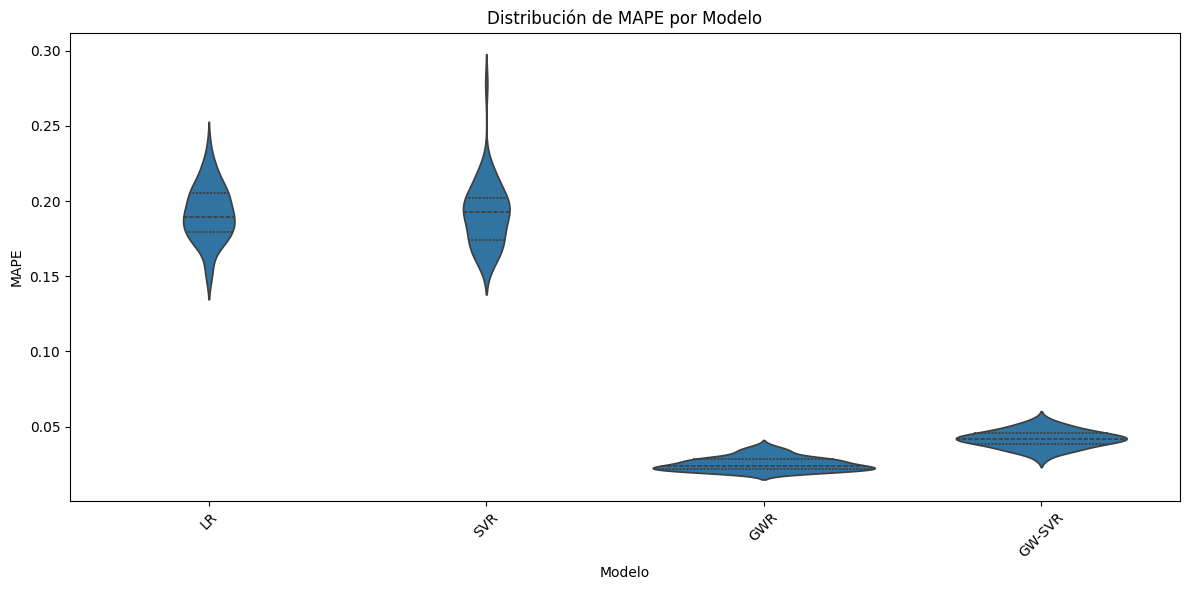

In [24]:
# Violin plot for MAE and model
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long[df_long['Métrica'] == 'MAPE'], x='Modelo', y='Valor', inner='quartile')
plt.title('Distribución de MAPE por Modelo')
plt.xticks(rotation=45)
plt.xlabel('Modelo')
plt.ylabel('MAPE')
plt.tight_layout()


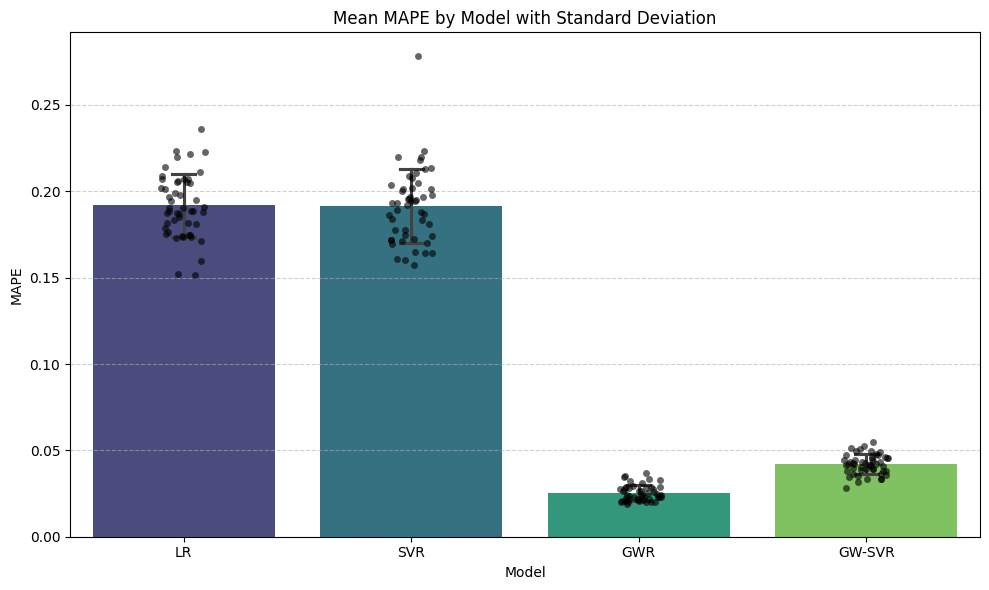

In [25]:
# Barplot + stripplot for MAE and model
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
	hue='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	errorbar='sd',
	legend=False,
    palette='viridis',
    capsize=0.1
)
sns.stripplot(
	x='Modelo',
	y='Valor',
	data=df_long[df_long['Métrica'] == 'MAPE'],
	color='black',
	alpha=0.6,
	jitter=True
)
plt.title('Mean MAPE by Model with Standard Deviation')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


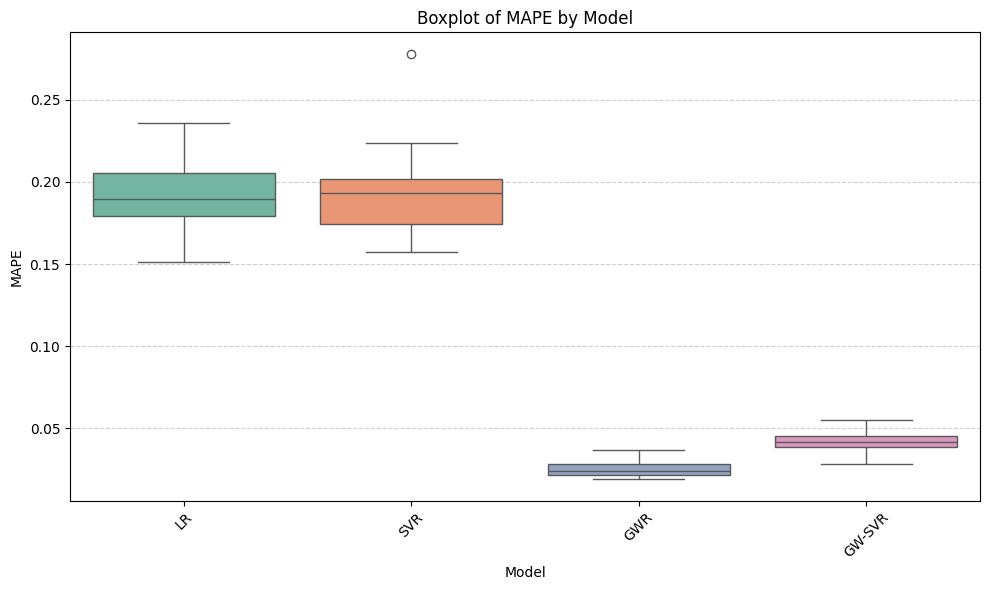

In [26]:
# Boxplot for MAE and model
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Modelo',
    hue='Modelo',
    y='Valor',
    data=df_long[df_long['Métrica'] == 'MAPE'],
    palette='Set2',
    legend=False
)
plt.title('Boxplot of MAPE by Model')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Final table

In [27]:
# Create a summary table with the best models for each dataset
mejores_modelos = pd.DataFrame({
    'Dataset': ['Georgia', 'PM25', 'Baltimore', 'Columbus', 'Sintético'],
    'Best Model': [mejor_mape_georgia, mejor_mape_pm25, mejor_mape_baltimore, mejor_mae_columbus, mejor_mae_sintetico],
    'MAE_mean': [mejor_modelo_georgia['MAE']['mean'],mejor_modelo_pm25['MAE']['mean'], mejor_modelo_baltimore['MAE']['mean'], mejor_modelo_columbus['MAE']['mean'], mejor_modelo_sintetico['MAE']['mean']],
    'MAE_std': [mejor_modelo_georgia['MAE']['std'],mejor_modelo_pm25['MAE']['std'], mejor_modelo_baltimore['MAE']['std'], mejor_modelo_columbus['MAE']['std'], mejor_modelo_sintetico['MAE']['std']],
    'MAPE_mean': [mejor_modelo_georgia['MAPE']['mean'], mejor_modelo_pm25['MAPE']['mean'], mejor_modelo_baltimore['MAPE']['mean'], mejor_modelo_columbus['MAPE']['mean'], mejor_modelo_sintetico['MAPE']['mean']],
    'MAPE_std': [mejor_modelo_georgia['MAPE']['std'], mejor_modelo_pm25['MAPE']['std'], mejor_modelo_baltimore['MAPE']['std'], mejor_modelo_columbus['MAPE']['std'], mejor_modelo_sintetico['MAPE']['std']],
    'NMSE_mean':  [mejor_modelo_georgia['NMSE']['mean'], mejor_modelo_pm25['NMSE']['mean'], mejor_modelo_baltimore['NMSE']['mean'], mejor_modelo_columbus['NMSE']['mean'], mejor_modelo_sintetico['NMSE']['mean']],
    'NMSE_std': [mejor_modelo_georgia['NMSE']['std'], mejor_modelo_pm25['NMSE']['std'], mejor_modelo_baltimore['NMSE']['std'], mejor_modelo_columbus['NMSE']['std'], mejor_modelo_sintetico['NMSE']['std']],
    'REP_mean': [mejor_modelo_georgia['REP']['mean'], mejor_modelo_pm25['REP']['mean'], mejor_modelo_baltimore['REP']['mean'], mejor_modelo_columbus['REP']['mean'], mejor_modelo_sintetico['REP']['mean']],
    'REP_std': [mejor_modelo_georgia['REP']['std'], mejor_modelo_pm25['REP']['std'], mejor_modelo_baltimore['REP']['std'], mejor_modelo_columbus['REP']['std'], mejor_modelo_sintetico['REP']['std']]
})

# Round the values to 2 decimal places for all columns except 'Dataset' and 'Best Model'
for col in mejores_modelos.columns:
    if col not in ['Dataset', 'Best Model']:
        mejores_modelos[col] = mejores_modelos[col].round(2)

# Format the mean and std values as "mean±std" for each metric
mejores_modelos['MAE'] = mejores_modelos.apply(lambda row: f"{row['MAE_mean']}±{row['MAE_std']}" if pd.notna(row['MAE_mean']) else '-', axis=1)
mejores_modelos['MAPE'] = mejores_modelos.apply(lambda row: f"{row['MAPE_mean']}±{row['MAPE_std']}" if pd.notna(row['MAPE_mean']) else '-', axis=1)
mejores_modelos['NMSE'] = mejores_modelos.apply(lambda row: f"{row['NMSE_mean']}±{row['NMSE_std']}" if pd.notna(row['NMSE_mean']) else '-', axis=1)
mejores_modelos['REP'] = mejores_modelos.apply(lambda row: f"{row['REP_mean']}±{row['REP_std']}" if pd.notna(row['REP_mean']) else '-', axis=1)

# Eliminate the mean and std columns
mejores_modelos = mejores_modelos.drop(columns=['MAE_mean', 'MAE_std', 
                                                 'MAPE_mean', 'MAPE_std', 
                                                 'NMSE_mean', 'NMSE_std', 
                                                 'REP_mean', 'REP_std'])

# Display the summary table with the best models 
display(mejores_modelos[['Dataset', 'Best Model', 
                        'MAE', 'MAPE', 'NMSE', 'REP']])

# Copy the summary table with the best models to clipboard
mejores_modelos[['Dataset', 'Best Model', 
                        'MAE', 'MAPE', 'NMSE', 'REP']].to_clipboard(index=False)


,Dataset,Best Model,MAE,MAPE,NMSE,REP
0,Georgia,GW-SVR,2.66±0.69,0.24±0.05,0.65±0.28,0.24±0.05
1,PM25,GW-SVR,18.25±3.09,0.48±0.16,0.7±0.19,0.31±0.05
2,Baltimore,SVR,9.05±1.69,0.3±0.12,0.36±0.1,0.21±0.03
3,Columbus,GW-SVR,7.7±2.48,6.79±11.3,0.45±0.21,0.22±0.09
4,Sintético,GWR,1.15±0.22,0.03±0.0,0.03±0.01,0.03±0.0
